In [1]:
# 导包
import numpy as np
# 固定随机数种子
np.random.seed(114514)
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

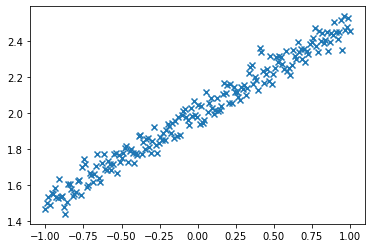

In [2]:
# 生成200个数据
X = np.linspace(-1,1,200)
np.random.shuffle(X)
Y = 0.5 * X + 2 + np.random.normal(0,0.05,(200,))

# 展示数据
plt.scatter(X,Y,marker='x')
plt.show()

In [3]:
# 前160个当训练集，后40个当测试集
X_train, Y_train = X[:160], Y[:160]
X_test, Y_test = X[160:], Y[160:]

In [4]:
# 画一个模型
model = Sequential()
model.add(Dense(units=1, input_dim=1))
# model.add(Dense(output_dim=1))

In [5]:
# 编译模型    mse:均方误差    sgd:随机梯度下降
model.compile(loss='mse',optimizer='sgd')

In [6]:
# 训练模型
history = model.fit(X_train, Y_train,validation_split=0.03, epochs=200, batch_size=16)

# for step in range(2000):
#     cost = model.train_on_batch(X_train,Y_train)
#     if step % 500 == 0:
#         print('train cost:',cost)

Epoch 1/200
10/10 [==============================] - 1s 12ms/step - loss: 3.5844 - val_loss: 2.9387
Epoch 2/200
10/10 [==============================] - 0s 3ms/step - loss: 2.4303 - val_loss: 1.9935
Epoch 3/200
10/10 [==============================] - 0s 3ms/step - loss: 1.6545 - val_loss: 1.3568
Epoch 4/200
10/10 [==============================] - 0s 3ms/step - loss: 1.1325 - val_loss: 0.9264
Epoch 5/200
10/10 [==============================] - 0s 3ms/step - loss: 0.7792 - val_loss: 0.6333
Epoch 6/200
10/10 [==============================] - 0s 3ms/step - loss: 0.5393 - val_loss: 0.4374
Epoch 7/200
10/10 [==============================] - 0s 3ms/step - loss: 0.3781 - val_loss: 0.3032
Epoch 8/200
10/10 [==============================] - 0s 3ms/step - loss: 0.2675 - val_loss: 0.2117
Epoch 9/200
10/10 [==============================] - 0s 3ms/step - loss: 0.1917 - val_loss: 0.1493
Epoch 10/200
10/10 [==============================] - 0s 3ms/step - loss: 0.1393 - val_loss: 0.1066
Epoch 11

10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 84/200
10/10 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 85/200
10/10 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 86/200
10/10 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 87/200
10/10 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 88/200
10/10 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 89/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 90/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 91/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 92/200
10/10 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 93/200


10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 165/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 166/200
10/10 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 167/200
10/10 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 168/200
10/10 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 169/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 170/200
10/10 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 171/200
10/10 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 172/200
10/10 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 173/200
10/10 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0022
Epoc

In [7]:
# 测试模型
print('正在测试...')
test_cost = model.evaluate(X_test,Y_test,batch_size=40)
print('test cost:',test_cost)
W,b = model.layers[0].get_weights()
print('Weights=',W,'Biases=',b)

正在测试...
1/1 [==============================] - 0s 48ms/step - loss: 0.0022
test cost: 0.002158907474949956
Weights= [[0.49983293]] Biases= [1.9983746]


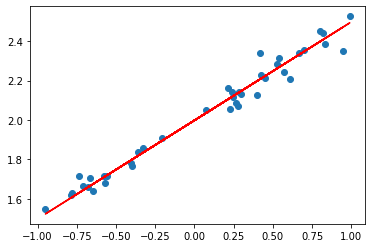

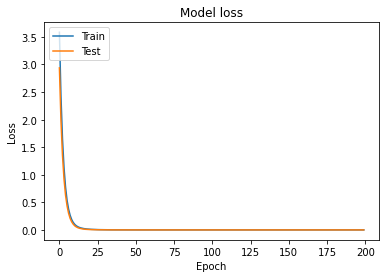

In [8]:
# 画出结果
Y_pred = model.predict(X_test)
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_pred,c='r')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [9]:
# 保存模型
model.save('小白的线性回归模型.h5')

In [10]:
# 预测模型
from keras.models import load_model
my_model = load_model('小白的线性回归模型.h5')
preds = my_model.predict([0.114514])
print('预测结果:',preds)


预测结果: [[2.0556126]]
